In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [3]:
%pip install tensorflow-gpu
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Note: you may need to restart the kernel to use updated packages.Collecting tensorflow-gpu
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'



  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\dream\anaconda3\envs\new_env\lib\site-packages\packaging\requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\dream\anaconda3\envs\new_env\lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\dream\anaconda3\envs\new_env\lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\dream\anaconda3\envs\new_env\lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
          marker = _parse_requirement_marker(
        File "c:\Users\dream\anaconda3\envs\new_env\lib\site-packag

Looking in indexes: https://download.pytorch.org/whl/cu118
     ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
     ---------------- ----------------------- 2.1/5.0 MB 16.8 MB/s eta 0:00:01
     ---------------------------------------- 5.0/5.0 MB 14.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
     ---------------------------------------  3.9/4.0 MB 21.3 MB/s eta 0:00:01
     ---------------------------------------- 4.0/4.0 MB 19.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/2.7 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.7 GB 20.0 MB/s eta 0:02:15
     ---------------------------------------- 0.0/2.7 GB 16.8 MB/s eta 0:02:41
     ---------------------------------------- 0.0/2.7 GB 15.8 MB/s eta 0:02:50
     ---------------------------------------- 0.0/2.7 GB 15.5 MB/s eta 0:02:54
     ---------------------------------------- 0.0/2.7 GB 16.5 MB/s eta 0:02:43
     ------------

In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  0


In [5]:
import torch
print(torch.cuda.is_available())


True


In [6]:
df = pd.read_csv(r"C:\Users\dream\OneDrive\Desktop\Fake_news\Data\train.csv")

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


#EDA

Text(0.5, 1.0, 'Distribution of Target Labels')

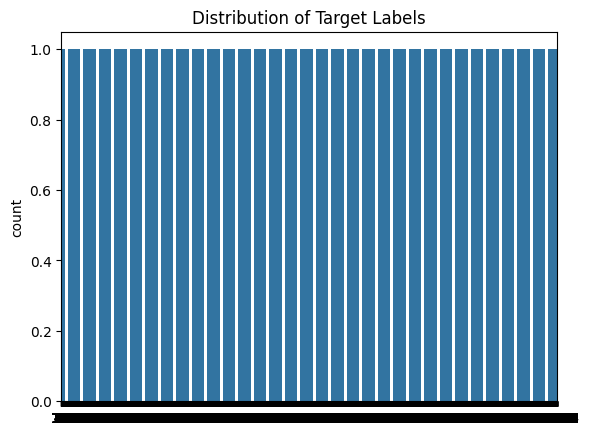

In [8]:
df.dropna()
sns.countplot(df['label'])
plt.title('Distribution of Target Labels')


Text(0.5, 1.0, 'Word Count Distribution in News Articles')

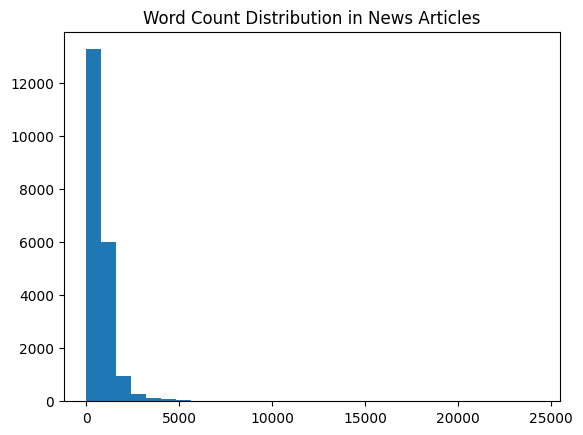

In [9]:
df['text'] = df['text'].fillna('')
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['word_count'], bins=30)
plt.title('Word Count Distribution in News Articles')


Text(0.5, 1.0, 'Text Length Distribution')

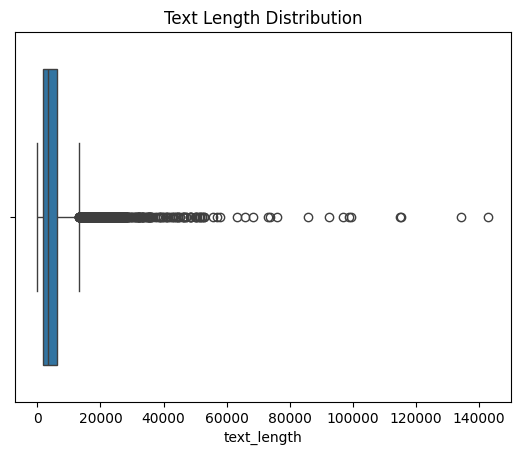

In [10]:
df['text_length'] = df['text'].apply(len)
sns.boxplot(x=df['text_length'])
plt.title('Text Length Distribution')


#PREPROCESSING

In [11]:
# 1 = fake
# 0 = true



In [12]:
X=df.drop('label', axis=1)
y=df['label']
y.value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [13]:
df.head()

,id,title,author,text,label,word_count,text_length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,710,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,557,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154,938


In [14]:
voc_size=5000
messages=X.copy()
messages.reset_index(inplace=True)

In [15]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dream\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
%

UsageError: Line magic function `%` not found.


In [17]:
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords

ps = PorterStemmer()
corpus = []

# Assuming 'messages' is a DataFrame and 'title' is a column
messages['title'] = messages['title'].fillna('')  # Fill missing values with empty strings

for i in range(0, len(messages)):
    title = str(messages['title'][i])  # Ensure the title is a string
    review = re.sub('[^a-zA-Z]', ' ', title)
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [18]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

#EDA AFTER PREPROCESSING

In [19]:
from wordcloud import WordCloud
fake_news = ' '.join([corpus[i] for i in range(len(corpus)) if df['label'][i] == 1])
wordcloud = WordCloud(width=800, height=400).generate(fake_news)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News (after Stemming)')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

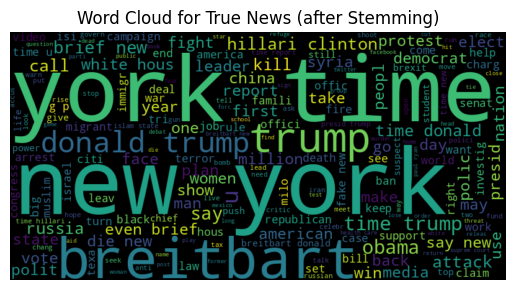

In [15]:
fake_news = ' '.join([corpus[i] for i in range(len(corpus)) if df['label'][i] == 0])
wordcloud = WordCloud(width=800, height=400).generate(fake_news)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News (after Stemming)')
plt.axis('off')
plt.show()

<Axes: >

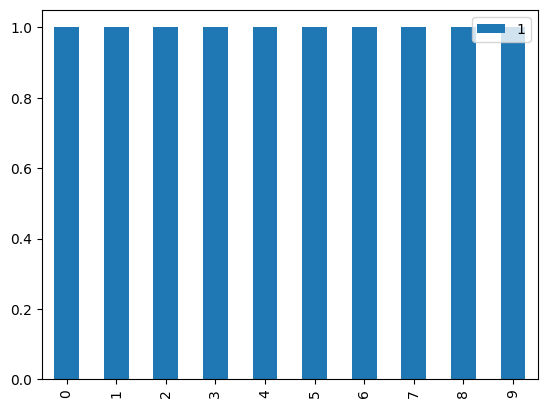

In [22]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
ngrams = count_vectorizer.fit_transform(df['text'])
ngrams_freq = Counter(count_vectorizer.get_feature_names_out())

pd.DataFrame(ngrams_freq.most_common(10)).plot(kind='bar')


In [16]:
from textblob import TextBlob

df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.hist(df['polarity'], bins=20)
plt.title('Sentiment Polarity Distribution')


KeyboardInterrupt: 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to include only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values (drop rows with missing data)
numeric_df = numeric_df.dropna()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


NameError: name 'df' is not defined

In [ ]:
fake_news_words = df[df['label'] == 1]['text'].str.split(expand=True).stack().value_counts()
real_news_words = df[df['label'] == 0]['text'].str.split(expand=True).stack().value_counts()
fake_news_words[:10].plot(kind='bar', color='red', alpha=0.7, label='Fake News')
real_news_words[:10].plot(kind='bar', color='blue', alpha=0.7, label='Real News')
plt.legend()
plt.title('Top Words in Fake vs. Real News')


In [ ]:
import nltk
df['pos_tags'] = df['text'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
pos_freq = nltk.FreqDist(tag for (word, tag) in df['pos_tags'].sum())
pos_freq.plot(30, title='POS Tagging Frequency')


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=5)
lda.fit(ngrams)

for i, topic in enumerate(lda.components_):
    print(f"Top words for topic #{i}:")
    print([count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


# MODEL GENERATION

In [20]:

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
onehot_repr=[one_hot(words, voc_size) for words in corpus]
sent_length=20
embedded_docs= pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  593,
       3017,  570,  347, 4972, 4928, 2439, 1684, 2796, 3450])

#LSTM

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout



#biLSTM

In [24]:
import tensorflow as tf

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [25]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [26]:
x_final=np.array(embedded_docs)
y_final=np.array(y)
x_final.shape, y_final.shape
((18285, 20), (18285,))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_final, y_final, test_size=.33, random_state=42)
model.fit( x_train, y_train, validation_data=( x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
218/218 [==============================] - 8s 26ms/step - loss: 0.2798 - accuracy: 0.8746 - val_loss: 0.2080 - val_accuracy: 0.9142
Epoch 2/10
218/218 [==============================] - 6s 26ms/step - loss: 0.1434 - accuracy: 0.9465 - val_loss: 0.1915 - val_accuracy: 0.9251
Epoch 3/10
218/218 [==============================] - 5s 25ms/step - loss: 0.0906 - accuracy: 0.9668 - val_loss: 0.2276 - val_accuracy: 0.9234
Epoch 4/10
218/218 [==============================] - 6s 26ms/step - loss: 0.0586 - accuracy: 0.9803 - val_loss: 0.2353 - val_accuracy: 0.9257
Epoch 5/10
218/218 [==============================] - 6s 27ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.3202 - val_accuracy: 0.9164
Epoch 6/10
218/218 [==============================] - 6s 26ms/step - loss: 0.0257 - accuracy: 0.9927 - val_loss: 0.3267 - val_accuracy: 0.9203
Epoch 7/10
218/218 [==============================] - 6s 28ms/step - loss: 0.0144 - accuracy: 0.9967 - val_loss: 0.3721 - val_accuracy: 0.9216

In [27]:
ypred= model.predict(x_test)
y_pred=[ypred>.5]
y_pred=y_pred[0]

215/215 [==============================] - 1s 4ms/step


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, y_pred))


[[3120  329]
 [ 236 3179]]


In [29]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3449
           1       0.91      0.93      0.92      3415

    accuracy                           0.92      6864
   macro avg       0.92      0.92      0.92      6864
weighted avg       0.92      0.92      0.92      6864



In [30]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


INFO:tensorflow:Assets written to: my_model\assets


In [31]:
model.save('my_model.h5')  

c:\Users\dream\anaconda3\envs\new_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
import pickle

# Save the corpus (list of stemmed, cleaned text)
with open('corpus.pkl', 'wb') as file:
    pickle.dump(corpus, file)

# Save one-hot encoded representation
with open('onehot_repr.pkl', 'wb') as file:
    pickle.dump(onehot_repr, file)

# Save padded sequences
with open('embedded_docs.pkl', 'wb') as file:
    pickle.dump(embedded_docs, file)


In [33]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(r'C:\Users\dream\OneDrive\Desktop\Fake_news\Model\my_model.h5')


In [40]:
def preprocess_text(messages):
    ps = PorterStemmer()
    corpus = []
    for i in range(0, len(messages)):
        title = str(messages['title'][i])  # Ensure the title is a string
        review = re.sub('[^a-zA-Z]', ' ', title)
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

# Save the preprocessing function
with open('preprocess_function.pkl', 'wb') as file:
    pickle.dump(preprocess_text, file)


In [35]:
df_test = pd.read_csv(r"C:\Users\dream\OneDrive\Desktop\Fake_news\Data\test.csv")


In [41]:
# Load the corpus
with open('corpus.pkl', 'rb') as file:
    corpus = pickle.load(file)

# Load the onehot_repr
with open('onehot_repr.pkl', 'rb') as file:
    onehot_repr = pickle.load(file)

# Load the embedded docs (padded sequences)
with open('embedded_docs.pkl', 'rb') as file:
    embedded_docs = pickle.load(file)

# Load the preprocessing function
with open('preprocess_function.pkl', 'rb') as file:
    preprocess_text = pickle.load(file)

# You can now use preprocess_text() with new data


In [43]:
# Assuming df_test has a 'title' column similar to the training set
df_test['title'] = df_test['title'].fillna('')  # Handle missing values

# Apply the preprocessing steps
corpus_test = preprocess_text(df_test)  # Apply preprocessing function to df_test

# One-hot encoding (use the same vocabulary size as in training)
onehot_repr_test = [one_hot(words, voc_size) for words in corpus_test]

# Pad the sequences
embedded_docs_test = pad_sequences(onehot_repr_test, padding='pre', maxlen=sent_length)

print(embedded_docs_test[0])  # Check the output


[   0    0    0    0    0    0    0    0    0 2675 3470 3027 1344  567
 1616  877  182 2841 2379 2053]


In [45]:
# Predict using the model
predictions = model.predict(embedded_docs_test)
predictions=[predictions>.5]
predictions=predictions[0]
# Display the predictions for df_test
print(predictions)


163/163 [==============================] - 1s 4ms/step
[[False]
 [ True]
 [ True]
 ...
 [False]
 [False]
 [False]]
